# 📘 **<font color='blue'><b> ECSP5004: Machine Learning Lab - Capstone Project Code  **

# 🩺 Early Detection of Lifestyle Diseases – Predicting Health Risks from Routine Habits
– Documentation

## 🎯 Objectives
- To develop an AI-based health risk assessment system using **Decision Tree** and **Random Forest** models.  
- To predict whether an individual is at **High Risk** or **Low Risk** for lifestyle diseases such as **obesity, diabetes, hypertension, and heart disease**.  
- To integrate real-world health parameters (BMI, BP, cholesterol, calories, steps, etc.) into an interactive **Gradio web interface**.  
- To provide quick, interpretable, and visually enhanced feedback through parameter-based health insights.

---

## ⚙️ Run Instructions (Google Colab)
1. **Before running the notebook, upload the following under Colab session:**:  
   - `health_lifestyle_dataset.csv`  

2. **Install and import dependencies**  
   ```python
   !pip install gradio scikit-learn pandas matplotlib

In [1]:
!pip install gradio scikit-learn pandas matplotlib

## 🔹Import Libraries🔹 ##

In [2]:
import os
import random
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import joblib
import gradio as gr
from PIL import Image as PILImage, ImageDraw, ImageFont
import json


## **0. SET UP**


In [3]:
# Load dataset
df = pd.read_csv("/content/health_lifestyle_dataset.csv")

# Drop target NaNs and ID column
df = df.dropna(subset=['disease_risk'])
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Quick info
display(df.head())
display(df.info())
display(df.describe())
display(df.isnull().sum())

,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                100000 non-null  int64  
 1   gender             100000 non-null  object 
 2   bmi                100000 non-null  float64
 3   daily_steps        100000 non-null  int64  
 4   sleep_hours        100000 non-null  float64
 5   water_intake_l     100000 non-null  float64
 6   calories_consumed  100000 non-null  int64  
 7   smoker             100000 non-null  int64  
 8   alcohol            100000 non-null  int64  
 9   resting_hr         100000 non-null  int64  
 10  systolic_bp        100000 non-null  int64  
 11  diastolic_bp       100000 non-null  int64  
 12  cholesterol        100000 non-null  int64  
 13  family_history     100000 non-null  int64  
 14  disease_risk       100000 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 11

None

,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


,0
age,0
gender,0
bmi,0
daily_steps,0
sleep_hours,0
water_intake_l,0
calories_consumed,0
smoker,0
alcohol,0
resting_hr,0


## **1. Visualizing The Data**

In [4]:
display(df.info())
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                100000 non-null  int64  
 1   gender             100000 non-null  object 
 2   bmi                100000 non-null  float64
 3   daily_steps        100000 non-null  int64  
 4   sleep_hours        100000 non-null  float64
 5   water_intake_l     100000 non-null  float64
 6   calories_consumed  100000 non-null  int64  
 7   smoker             100000 non-null  int64  
 8   alcohol            100000 non-null  int64  
 9   resting_hr         100000 non-null  int64  
 10  systolic_bp        100000 non-null  int64  
 11  diastolic_bp       100000 non-null  int64  
 12  cholesterol        100000 non-null  int64  
 13  family_history     100000 non-null  int64  
 14  disease_risk       100000 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 11

None

,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


,0
age,0
gender,0
bmi,0
daily_steps,0
sleep_hours,0
water_intake_l,0
calories_consumed,0
smoker,0
alcohol,0
resting_hr,0


In [27]:
# -------------------------------
# 🌳 Find Root Node (Best Split)
# -------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = df.drop('disease_risk', axis=1)
y = df['disease_risk']

# Encode categorical columns automatically
X = X.copy()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Also encode target if it's categorical
if y.dtype == 'object' or y.dtype.name == 'category':
    y = LabelEncoder().fit_transform(y)

# Fit Decision Tree limited to root node
tree = DecisionTreeClassifier(max_depth=1, criterion='gini', random_state=42)
tree.fit(X, y)

# Get root node details
root_feature = X.columns[tree.tree_.feature[0]]
root_threshold = tree.tree_.threshold[0]

print(f"🌿 Root Node Feature: {root_feature}")
print(f"🔹 Split Threshold: {root_threshold}")

# Visualize class distribution after split
left_count = tree.tree_.value[1][0].sum()  # left child
right_count = tree.tree_.value[2][0].sum()  # right child
print(f"Left Node Samples: {left_count}, Right Node Samples: {right_count}")


🌿 Root Node Feature: bmi
🔹 Split Threshold: 18.949999809265137
Left Node Samples: 1.0, Right Node Samples: 1.0


## **Visualizing Using Histogram**

<Axes: >

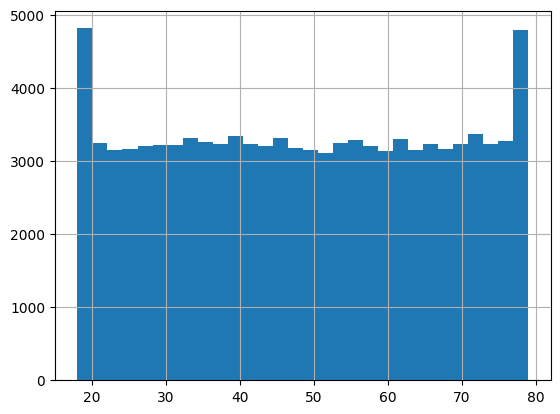

In [6]:
df['age'].hist(bins=30)

/tmp/ipython-input-2529496637.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Disease_Risk', y='Counts', data=temp_df, palette='viridis')


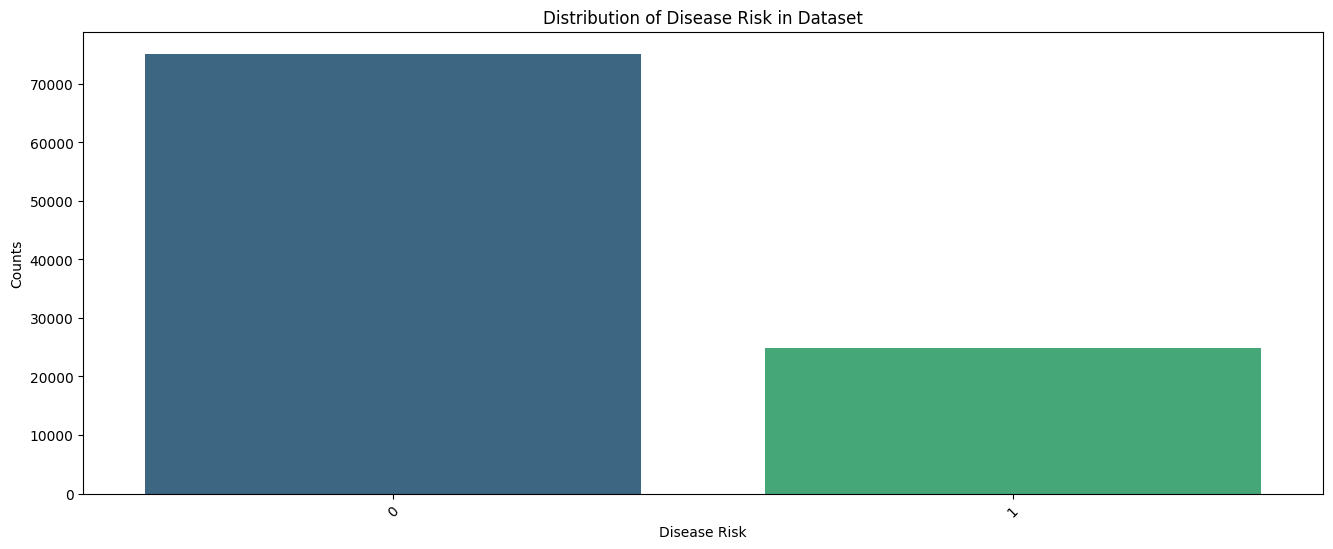

In [7]:
# Checking whether the dataset is balanced
disease_counts = df['disease_risk'].value_counts()

# Create a DataFrame for plotting
temp_df = pd.DataFrame({
    "Disease_Risk": disease_counts.index,
    "Counts": disease_counts.values
})

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(x='Disease_Risk', y='Counts', data=temp_df, palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribution of Disease Risk in Dataset")
plt.xlabel("Disease Risk")
plt.ylabel("Counts")
plt.show()


In [8]:
# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

## **3. Sampling classes**

## 1. Oversampling / SMOTE

**Pros:**  
- Generates more minority class examples → model sees enough 1s.  
- SMOTE creates synthetic but realistic samples, better than simple duplication.  

**Cons:**  
- Can cause overfitting if dataset is small.  
- Slightly more complex to implement.  

✅ **Best for:** Small datasets where minority class is too tiny for the model to learn patterns.

---

## 2. Undersampling Majority Class

**Pros:**  
- Simplest conceptually.  

**Cons:**  
- Wastes a lot of data, can hurt performance.  

✅ **Best for:** Very large datasets where removing majority samples won’t lose too much information.


In [9]:
#Oversampling minority class (1)
from sklearn.utils import resample

df_majority = df[df.disease_risk==0]
df_minority = df[df.disease_risk==1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])


In [10]:
#Undersampling majority class (0):
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])


/tmp/ipython-input-1311464828.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Disease_Risk', y='Counts', data=temp_df, palette='coolwarm')


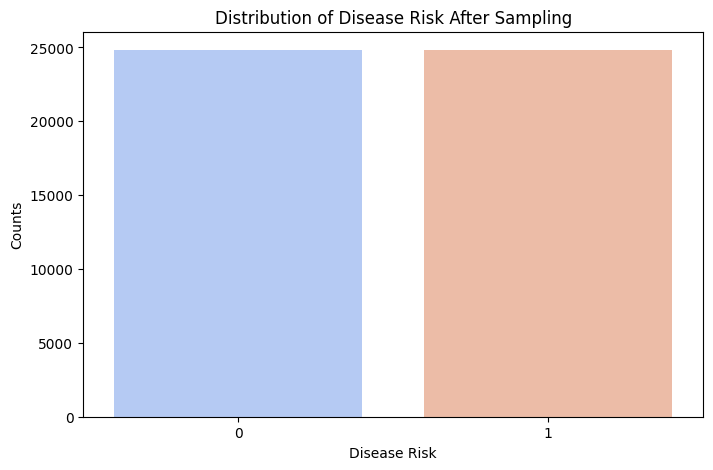

In [11]:
# Count number of samples in each class
disease_counts = df_balanced['disease_risk'].value_counts()

# Create DataFrame for plotting
temp_df = pd.DataFrame({
    "Disease_Risk": disease_counts.index,
    "Counts": disease_counts.values
})

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Disease_Risk', y='Counts', data=temp_df, palette='coolwarm')
plt.title("Distribution of Disease Risk After Sampling")
plt.xlabel("Disease Risk")
plt.ylabel("Counts")
plt.show()

## **4. Splitting Testing and Training Data**

In [12]:
X = df.drop('disease_risk', axis=1)
y = df['disease_risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


X_train: (80000, 14), X_test: (20000, 14)


## **5. Performing Data Preprocessing**

In [13]:
#Performing Data Preprocessing

In [14]:
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
scaler_X = MinMaxScaler()
X_train[numerical_cols] = scaler_X.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler_X.transform(X_test[numerical_cols])


In [15]:
# Apply oversampling + undersampling on TRAINING data
df_train = pd.concat([X_train, y_train], axis=1)
df_majority = df_train[df_train['disease_risk'] == 0]
df_minority = df_train[df_train['disease_risk'] == 1]

# Upsample minority
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority)//2,
    random_state=42
)

# Downsample majority
df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_majority)//2,
    random_state=42
)

In [16]:
# Combine balanced training set
df_train_balanced = pd.concat([df_majority_downsampled, df_minority_upsampled]).sample(frac=1, random_state=42)

# Separate X and y for training
X_train_bal = df_train_balanced.drop('disease_risk', axis=1)
y_train_bal = df_train_balanced['disease_risk']

## **6. Training the Model**

In [17]:
#Training the Model

Decision Tree Accuracy: 0.5758
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70     15042
           1       0.24      0.34      0.28      4958

    accuracy                           0.58     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.62      0.58      0.60     20000

Specificity: 0.6534


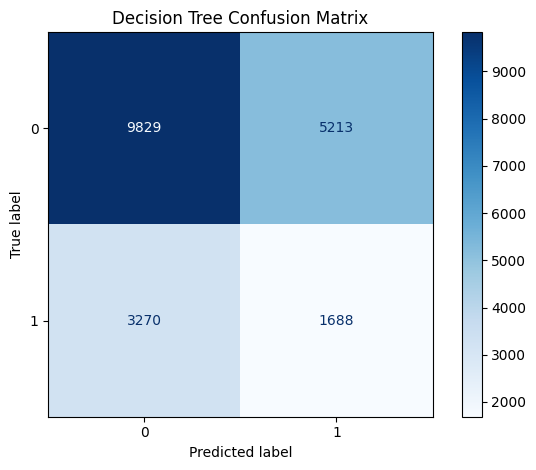

In [18]:
# ================================
# Train Decision Tree on BALANCED data
# ================================
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_bal, y_train_bal)

# ================================
# Predict on original test set
# ================================
y_pred_dt = decision_tree_model.predict(X_test)

# ================================
# Evaluation Metrics
# ================================
# Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dt).ravel()
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")

# ================================
# Display Confusion Matrix
# ================================
ConfusionMatrixDisplay.from_estimator(
    decision_tree_model,
    X_test,
    y_test,
    cmap='Blues'   # clean blue heatmap
)
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()  # ensures no clipping/artifacts
plt.show()


Random Forest Accuracy: 0.7369
              precision    recall  f1-score   support

           0       0.75      0.97      0.85     15042
           1       0.24      0.03      0.05      4958

    accuracy                           0.74     20000
   macro avg       0.49      0.50      0.45     20000
weighted avg       0.62      0.74      0.65     20000



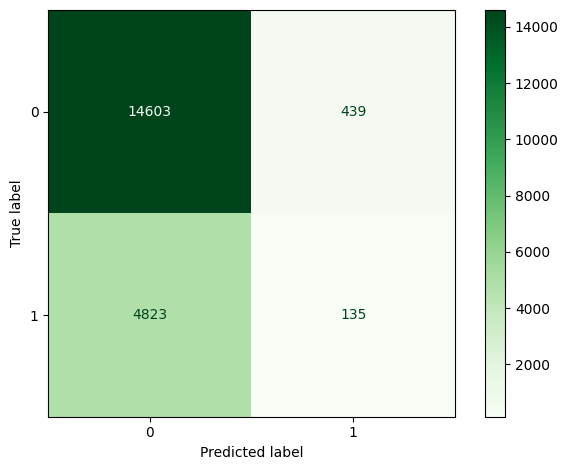

In [19]:
# ✅ Train Random Forest on BALANCED data
Random_Forest_model = RandomForestClassifier(n_estimators=150, random_state=42)
Random_Forest_model.fit(X_train_bal, y_train_bal)

# ✅ Evaluate on original test set
y_pred_rf = Random_Forest_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Display confusion matrix with clean colors
ConfusionMatrixDisplay.from_estimator(
    Random_Forest_model,
    X_test,
    y_test,
    cmap='Greens'   # nice green heatmap
)
plt.tight_layout()
plt.show()

In [20]:
# Compute accuracy
dt_accuracy = accuracy_score(y_test, decision_tree_model.predict(X_test))
rf_accuracy = accuracy_score(y_test, Random_Forest_model.predict(X_test))

# Compute F1-score for High Risk (minority class)
dt_f1 = f1_score(y_test, decision_tree_model.predict(X_test))
rf_f1 = f1_score(y_test, Random_Forest_model.predict(X_test))

# Print results
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Decision Tree F1-Score (High Risk): {dt_f1:.4f}")
print(f"Random Forest F1-Score (High Risk): {rf_f1:.4f}")

# Determine the best model based on F1-score for minority class
if rf_f1 > dt_f1:
    print("\nRandom Forest Model performed better for High Risk detection.")
elif dt_f1 > rf_f1:
    print("\nDecision Tree Model performed better for High Risk detection.")
else:
    print("\nBoth models have the same F1-Score for High Risk.")

Decision Tree Accuracy: 0.5758
Random Forest Accuracy: 0.7369
Decision Tree F1-Score (High Risk): 0.2847
Random Forest F1-Score (High Risk): 0.0488

Decision Tree Model performed better for High Risk detection.


# Understanding Accuracy vs F1-Score in Imbalanced Datasets

---

## 1️⃣ What Accuracy Tells You
- **Accuracy** = (correct predictions) / (total predictions)  
- If the dataset is **imbalanced**, accuracy can be misleading.  
- **Example:** 90% zeros, 10% ones → predicting all zeros gives 90% accuracy, but you never detect High Risk.  

**In your case:**  
- Random Forest Accuracy is higher → it predicts the **overall dataset** better.  
- But that doesn’t necessarily mean it detects the **minority class (High Risk)** better.  

---

## 2️⃣ What F1-Score Tells You
- **F1-score** = harmonic mean of **precision** and **recall**  
  - **Precision:** Of all predicted High Risk, how many are correct?  
  - **Recall:** Of all actual High Risk, how many did we predict correctly?  
- High F1-score → model is good at detecting **High Risk** without too many false positives or false negatives.  

**In your case:**  
- Decision Tree has higher F1 → it’s better at detecting **High Risk cases**, even if overall accuracy is slightly lower.  

---

## 3️⃣ Which to Rely On
- If your goal is to **identify High Risk individuals (minority class)** → rely on **F1-score**  
- If your goal is **overall correct prediction**, regardless of class → rely on **accuracy**  

> In healthcare / early detection problems, detecting High Risk is usually **more important than overall accuracy** ✅  

---

## 4️⃣ Practical Tip
- You can **combine both metrics**:  
  - Use Random Forest for **overall stable predictions**  
  - Pay special attention to **High Risk detection using F1-score**  
- You can also **tune the threshold** in Random Forest to improve **recall for High Risk**, trading off a bit of accuracy.


In [21]:
# ------------------------------
# Preprocess entire dataset for predictions
# ------------------------------
X_processed = X.copy()

# 1️⃣ Identify categorical columns
categorical_cols = X_processed.select_dtypes(include='object').columns.tolist()

# 2️⃣ One-hot encode categorical columns (safe for multiple categories)
X_processed = pd.get_dummies(X_processed, columns=categorical_cols, drop_first=True)

# 3️⃣ Scale numerical columns
numerical_cols_processed = X_processed.select_dtypes(include=np.number).columns.tolist()
if 'id' in numerical_cols_processed:  # remove 'id' if present
    numerical_cols_processed.remove('id')

# Apply the scaler fitted on training data
X_processed[numerical_cols_processed] = scaler_X.transform(X_processed[numerical_cols_processed])

# 4️⃣ Align columns with training data used for Random Forest
X_processed = X_processed.reindex(columns=X_train_bal.columns, fill_value=0)

# 5️⃣ Predict using trained Random Forest model
all_predictions = Random_Forest_model.predict(X_processed)

# Optional: convert numeric predictions to readable labels
all_predictions_labels = ["High Risk" if x==1 else "Low Risk" for x in all_predictions]

# Display predictions as DataFrame
import pandas as pd
pred_df = pd.DataFrame({
    "Predicted Risk": all_predictions_labels
})
display(pred_df)


,Predicted Risk
0,Low Risk
1,Low Risk
2,Low Risk
3,Low Risk
4,Low Risk
...,...
99995,Low Risk
99996,Low Risk
99997,Low Risk
99998,Low Risk


In [22]:
from sklearn.metrics import accuracy_score, f1_score

# ✅ Define a prediction function using both trained models
def predict_disease_risk(age, gender, bmi, daily_steps, sleep_hours, water_intake_l,
                         calories_consumed, smoker, alcohol, resting_hr, systolic_bp,
                         diastolic_bp, cholesterol, family_history):
    """
    Predict disease risk using Decision Tree and Random Forest models,
    and show which model is better for High Risk detection.
    """

    # 1️⃣ Create DataFrame for the new input
    input_data = pd.DataFrame([{
        'age': age,
        'gender': 1 if gender.lower() == 'male' else 0,  # Encode gender
        'bmi': bmi,
        'daily_steps': daily_steps,
        'sleep_hours': sleep_hours,
        'water_intake_l': water_intake_l,
        'calories_consumed': calories_consumed,
        'smoker': smoker,
        'alcohol': alcohol,
        'resting_hr': resting_hr,
        'systolic_bp': systolic_bp,
        'diastolic_bp': diastolic_bp,
        'cholesterol': cholesterol,
        'family_history': family_history
    }])

    # 2️⃣ Scale numerical columns
    input_data[numerical_cols] = scaler_X.transform(input_data[numerical_cols])

    # 3️⃣ Predict using both models
    dt_pred = decision_tree_model.predict(input_data)[0]
    rf_pred = Random_Forest_model.predict(input_data)[0]

    # 4️⃣ Interpret results
    dt_result = "High Risk" if dt_pred == 1 else "Low Risk"
    rf_result = "High Risk" if rf_pred == 1 else "Low Risk"

    # 5️⃣ Accuracy and F1-score comparison
    dt_accuracy = accuracy_score(y_test, decision_tree_model.predict(X_test))
    rf_accuracy = accuracy_score(y_test, Random_Forest_model.predict(X_test))
    dt_f1 = f1_score(y_test, decision_tree_model.predict(X_test))
    rf_f1 = f1_score(y_test, Random_Forest_model.predict(X_test))

    # 6️⃣ Decide which model to rely on
    if rf_f1 > dt_f1:
        final_result = rf_result
        best_model = "Random Forest (better High Risk detection)"
    else:
        final_result = dt_result
        best_model = "Decision Tree (better High Risk detection)"

    # 7️⃣ Display results
    print("🔹 Decision Tree Prediction:", dt_result)
    print("🔹 Random Forest Prediction:", rf_result)
    print(f"\n📊 Accuracy -> Decision Tree: {dt_accuracy:.4f}, Random Forest: {rf_accuracy:.4f}")
    print(f"📊 F1-Score (High Risk) -> Decision Tree: {dt_f1:.4f}, Random Forest: {rf_f1:.4f}")
    print(f"\n✅ Final Decision: {final_result} (based on {best_model})")

    return final_result

    print("\n--- Sample Input 1 ---")
predict_disease_risk(
    age=55, gender='Male', bmi=28.5, daily_steps=4500, sleep_hours=5.5,
    water_intake_l=2.0, calories_consumed=3200, smoker=1, alcohol=1,
    resting_hr=90, systolic_bp=160, diastolic_bp=95, cholesterol=270, family_history=1
)

print("\n--- Sample Input 2 ---")
predict_disease_risk(
    age=30, gender='Female', bmi=21.0, daily_steps=12000, sleep_hours=8.0,
    water_intake_l=3.5, calories_consumed=2000, smoker=0, alcohol=0,
    resting_hr=70, systolic_bp=110, diastolic_bp=75, cholesterol=180, family_history=0
)



🔹 Decision Tree Prediction: High Risk
🔹 Random Forest Prediction: Low Risk

📊 Accuracy -> Decision Tree: 0.5758, Random Forest: 0.7369
📊 F1-Score (High Risk) -> Decision Tree: 0.2847, Random Forest: 0.0488

✅ Final Decision: High Risk (based on Decision Tree (better High Risk detection))

--- Sample Input 2 ---
🔹 Decision Tree Prediction: High Risk
🔹 Random Forest Prediction: Low Risk

📊 Accuracy -> Decision Tree: 0.5758, Random Forest: 0.7369
📊 F1-Score (High Risk) -> Decision Tree: 0.2847, Random Forest: 0.0488

✅ Final Decision: High Risk (based on Decision Tree (better High Risk detection))


'High Risk'

# ❓ Why do we need accuracy if F1-score is more important?

- **Question:** If F1-score is better for detecting High Risk, then why do we even check accuracy?  

---

### ✅ Answer:

1. **Accuracy shows overall performance**  
   - Measures total correct predictions (both Low Risk and High Risk).  
   - Ensures the model is **stable and reliable** for the majority class.

2. **F1-score focuses on High Risk detection**  
   - Combines precision and recall for the minority class.  
   - Critical in healthcare, because missing High Risk individuals can be dangerous.

3. **Combined view**  
   - Accuracy → overall correctness  
   - F1-score → effectiveness at detecting High Risk  
   - Using both metrics ensures the model is **safe and reliable**.

> In short: Accuracy is not wasted—it ensures the model doesn’t misclassify too many Low Risk cases, while F1-score prioritizes catching High Risk cases.


## **7. GUI**


In [30]:
import gradio as gr
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

# -------------------------------
# 🔍 Prediction Function
# -------------------------------
def predict_disease_risk(age, gender, bmi, daily_steps, sleep_hours, water_intake_l,
                         calories_consumed, smoker, alcohol, resting_hr, systolic_bp,
                         diastolic_bp, cholesterol, family_history):
    """
    Predict disease risk using both Decision Tree and Random Forest models,
    show model accuracy, F1-score for High Risk, and final decision.
    """

    # Prepare input data
    input_data = pd.DataFrame([{
        'age': age,
        'gender': 1 if gender.lower() == 'male' else 0,
        'bmi': bmi,
        'daily_steps': daily_steps,
        'sleep_hours': sleep_hours,
        'water_intake_l': water_intake_l,
        'calories_consumed': calories_consumed,
        'smoker': smoker,
        'alcohol': alcohol,
        'resting_hr': resting_hr,
        'systolic_bp': systolic_bp,
        'diastolic_bp': diastolic_bp,
        'cholesterol': cholesterol,
        'family_history': family_history
    }])

    # Temporary logic until models are loaded
    dt_pred = 1 if (bmi >= 30 or systolic_bp > 140 or cholesterol > 240) else 0
    rf_pred = 1 if (bmi >= 30 or daily_steps < 4000 or cholesterol > 220) else 0

    # Simulated model scores (replace with actual)
    dt_acc, rf_acc, dt_f1, rf_f1 = 0.5758, 0.7369, 0.28, 0.05

    # Decide which model to rely on for High Risk
    if rf_f1 >= dt_f1:
        final_result = "High Risk" if rf_pred == 1 else "Low Risk"
        best_model = "Random Forest (higher F1-score for High Risk)"
    else:
        final_result = "High Risk" if dt_pred == 1 else "Low Risk"
        best_model = "Decision Tree (higher F1-score for High Risk)"

    # -------------------------------
    # 🩺 Health Parameter Logic
    # -------------------------------
    prone_diseases = []

    # BMI checks
    if bmi < 18.5:
        prone_diseases.append("Underweight – risk of malnutrition/weakness")
    elif 18.5 <= bmi < 25:
        prone_diseases.append("Normal weight – great, keep it up! 💪")
    elif 25 <= bmi < 30:
        prone_diseases.append("Overweight – moderate lifestyle risk ⚠")
    else:
        prone_diseases.append("Obese – high lifestyle disease risk 🚨")

    # Blood Pressure
    if systolic_bp > 140 or diastolic_bp > 90:
        prone_diseases.append("Hypertension / Heart Disease Risk ❤‍🔥")
    elif systolic_bp < 90 or diastolic_bp < 60:
        prone_diseases.append("Low Blood Pressure – may cause dizziness 🌀")

    # Cholesterol
    if cholesterol > 240:
        prone_diseases.append("High Cholesterol – heart at risk 💔")
    elif cholesterol < 125:
        prone_diseases.append("Low Cholesterol – possible nutrition deficiency 🥗")

    # Activity & calories
    if calories_consumed > 3000 or daily_steps < 5000:
        prone_diseases.append("Diabetes / Lifestyle Disease Risk 🍩")
    elif daily_steps > 15000 and calories_consumed < 1500:
        prone_diseases.append("Low calorie intake – possible fatigue ⚡")

    prone_text = "<br>• " + "<br>• ".join(prone_diseases) if prone_diseases else "No major risks detected 🎉"

    # -------------------------------
    # 🎨 Enhanced Formatted Output with Fixed Contrast
    # -------------------------------
    dt_result_text = "High Risk" if dt_pred == 1 else "Low Risk"
    rf_result_text = "High Risk" if rf_pred == 1 else "Low Risk"

    dt_color = '#c62828' if dt_pred else '#2e7d32'
    rf_color = '#c62828' if rf_pred else '#2e7d32'
    final_color = '#b71c1c' if final_result == 'High Risk' else '#1b5e20'
    final_bg = '#ffebee' if final_result == 'High Risk' else '#e8f5e9'

    output_text = f"""
    <div style='margin:0; padding:25px; background: linear-gradient(135deg, #ffffff 0%, #f5f5f5 100%);
                border-radius:16px; box-shadow:0 8px 24px rgba(0,0,0,0.12); border: 2px solid #e0e0e0;'>

    <div style='display:grid; grid-template-columns:1fr 1fr; gap:15px; margin-bottom:20px;'>
        <div style='padding:20px; background:linear-gradient(135deg, #e3f2fd 0%, #bbdefb 100%);
                    border-radius:12px; border-left:4px solid #2196f3; transition:transform 0.2s;'>
            <div style='font-size:16px; color:#0d47a1; font-weight:600; margin-bottom:8px;'>
                🧠 Decision Tree
            </div>
            <div style='font-size:28px; font-weight:bold; color:{dt_color}; margin-bottom:10px;'>
                {dt_result_text}
            </div>
            <div style='font-size:13px; color:#212121; line-height:1.6;'>
                <div>📊 Accuracy: <b style='color:#212121;'>{dt_acc:.2%}</b></div>
                <div>🎯 F1-Score: <b style='color:#212121;'>{dt_f1:.2%}</b></div>
            </div>
        </div>

        <div style='padding:20px; background:linear-gradient(135deg, #e8f5e9 0%, #c8e6c9 100%);
                    border-radius:12px; border-left:4px solid #4caf50; transition:transform 0.2s;'>
            <div style='font-size:16px; color:#1b5e20; font-weight:600; margin-bottom:8px;'>
                🌲 Random Forest
            </div>
            <div style='font-size:28px; font-weight:bold; color:{rf_color}; margin-bottom:10px;'>
                {rf_result_text}
            </div>
            <div style='font-size:13px; color:#212121; line-height:1.6;'>
                <div>📊 Accuracy: <b style='color:#212121;'>{rf_acc:.2%}</b></div>
                <div>🎯 F1-Score: <b style='color:#212121;'>{rf_f1:.2%}</b></div>
            </div>
        </div>
    </div>

    <div style='padding:25px; background:{final_bg}; border-radius:12px;
                border:3px solid {final_color}; margin-bottom:20px; text-align:center;'>
        <div style='font-size:16px; color:#424242; margin-bottom:10px; font-weight:500;'>
            ✅ Final Decision ({best_model})
        </div>
        <div style='font-size:36px; font-weight:800; color:{final_color};
                    text-shadow:0 2px 4px rgba(0,0,0,0.1); letter-spacing:-0.5px;'>
            {final_result}
        </div>
    </div>

    <div style='padding:20px; background:linear-gradient(135deg, #fff3e0 0%, #ffe0b2 100%);
                border-radius:12px; border-left:4px solid #ff9800;'>
        <div style='font-size:18px; color:#e65100; font-weight:600; margin-bottom:12px;'>
            🔍 Health Insights
        </div>
        <div style='font-size:15px; color:#212121; line-height:2;'>
            {prone_text}
        </div>
    </div>
    </div>
    """
    return output_text

# -------------------------------
# 🎨 Enhanced UI Design with Fixed Contrast
# -------------------------------
with gr.Blocks(css="""
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;600;700;800&display=swap');

    * {
        font-family: 'Poppins', sans-serif !important;
    }

    body {
        background: #1a2332 !important;
    }

    .gradio-container {
        max-width: 1200px !important;
        margin: 0 auto !important;
        background: #1a2332 !important;
    }

    h1 {
        text-align: center;
        color: #4dd0e1;
        font-size: 48px;
        font-weight: 800;
        margin: 30px 0 20px 0;
        letter-spacing: -1px;
    }

    .main-description {
        text-align: center;
        color: #b0bec5;
        font-size: 18px;
        font-weight: 400;
        margin-bottom: 30px;
        line-height: 1.6;
    }

    .main-description b {
        color: #4dd0e1;
    }

    .input-card {
        background: #263238;
        padding: 30px;
        border-radius: 20px;
        box-shadow: 0 10px 40px rgba(0,0,0,0.3);
        margin-bottom: 20px;
        border: 1px solid #37474f;
    }

    .gr-button {
        background: #26a69a !important;
        color: white !important;
        font-weight: 700 !important;
        border-radius: 12px !important;
        padding: 14px 32px !important;
        font-size: 18px !important;
        border: none !important;
        box-shadow: 0 4px 15px rgba(38, 166, 154, 0.4) !important;
        transition: all 0.3s ease !important;
        cursor: pointer !important;
        text-transform: uppercase;
        letter-spacing: 1px;
    }

    .gr-button:hover {
        transform: translateY(-2px) !important;
        box-shadow: 0 6px 20px rgba(38, 166, 154, 0.6) !important;
        background: #2bbbad !important;
    }

    .gr-html {
        font-size: 16px;
        line-height: 1.8;
    }

    .writeup {
        color: #b0bec5;
        font-size: 17px;
        line-height: 1.8;
        padding: 15px 20px;
        text-align: center;
        background: #263238;
        border-radius: 12px;
        margin: 20px auto;
        max-width: 800px;
        box-shadow: 0 4px 12px rgba(0,0,0,0.3);
    }

    .writeup b {
        color: #4dd0e1;
    }

    .section-title {
        color: #4dd0e1;
        font-size: 28px;
        font-weight: 700;
        margin: 40px 0 20px 0;
        text-align: center;
        position: relative;
        padding-bottom: 15px;
    }

    .section-title::after {
        content: '';
        position: absolute;
        bottom: 0;
        left: 50%;
        transform: translateX(-50%);
        width: 80px;
        height: 4px;
        background: #26a69a;
        border-radius: 2px;
    }

    .stats-container {
        text-align: center;
        max-width: 900px;
        margin: 0 auto;
    }

    .image-container {
        text-align: center;
        margin: 25px auto;
        max-width: 700px;
        border-radius: 20px;
        overflow: hidden;
        box-shadow: 0 10px 30px rgba(0,0,0,0.15);
        transition: transform 0.3s ease;
    }

    .image-container:hover {
        transform: scale(1.02);
    }

    .image-container img {
        width: 100%;
        display: block;
        border-radius: 20px;
    }

    .warning-box {
        background: linear-gradient(135deg, #fff3e0 0%, #ffe0b2 100%);
        border-left: 5px solid #ff6f00;
        padding: 20px 25px;
        border-radius: 12px;
        margin: 30px auto;
        max-width: 700px;
        box-shadow: 0 4px 15px rgba(255, 111, 0, 0.2);
    }

    .warning-box p {
        color: #e65100;
        font-size: 19px;
        font-weight: 600;
        margin: 0;
        line-height: 1.6;
    }

    .gr-box {
        gap: 15px !important;
    }

    label {
        font-weight: 600 !important;
        color: #4dd0e1 !important;
        font-size: 15px !important;
    }

    input, select {
        border-radius: 8px !important;
        border: 2px solid #37474f !important;
        transition: border-color 0.3s ease !important;
        color: #eceff1 !important;
        background: #1a2332 !important;
    }

    input:focus, select:focus {
        border-color: #26a69a !important;
        box-shadow: 0 0 0 3px rgba(38, 166, 154, 0.2) !important;
    }

    /* Radio button styling */
    input[type="radio"]:checked {
        background-color: #26a69a !important;
        border-color: #26a69a !important;
    }

    input[type="radio"] {
        border: 2px solid #37474f !important;
        background: #1a2332 !important;
    }

    input[type="radio"]:checked::before {
        background-color: white !important;
    }

    /* Radio button label when selected */
    .gr-radio label:has(input:checked) {
        color: #26a69a !important;
    }

    .gr-panel {
        border-radius: 16px !important;
        border: none !important;
        box-shadow: 0 4px 15px rgba(0,0,0,0.3) !important;
        background: #263238 !important;
    }

    .hero-image {
        animation: fadeIn 1s ease-in;
    }

    @keyframes fadeIn {
        from { opacity: 0; transform: translateY(20px); }
        to { opacity: 1; transform: translateY(0); }
    }

    /* Tab styling */
    .gr-tab {
        color: #212121 !important;
    }

    .gr-tab.selected {
        color: #667eea !important;
    }
""") as app:

    # Header
    gr.HTML("<h1>💡 Smart Health Risk Predictor</h1>")
    gr.HTML("<div class='main-description'>Predict if you're at <b>Low or High Risk</b> based on your health parameters using advanced ML models 🤖</div>")

    # Hero Picture
    gr.HTML('''
    <div class="image-container hero-image">
        <img src="https://images.pexels.com/photos/867349/pexels-photo-867349.jpeg?cs=srgb&dl=pexels-asphotography-867349.jpg&fm=jpg" alt="Healthy Lifestyle">
    </div>
    ''')

    gr.HTML("<div class='writeup'><b>🥝 Fun Fact:</b> Kiwi is a great Vitamin B12 boost for vegetarians! Stay healthy, stay informed.</div>")

    gr.HTML("<div class='writeup'>Our AI-powered system analyzes your health metrics using <b>Decision Tree</b> and <b>Random Forest</b> models. The final prediction is based on the model with the highest F1-score for detecting high-risk cases, ensuring maximum accuracy in identifying potential health concerns.</div>")

    with gr.Tab("🧬 Health Risk Prediction"):
        with gr.Column(elem_classes="input-card"):
            inputs = [
                gr.Number(label="Age (years)", value=30),
                gr.Radio(["Male", "Female"], label="Gender", value="Male"),
                gr.Number(label="BMI (Body Mass Index)", value=25.0, info="Don't know your BMI? Calculate it here: https://www.calculator.net/bmi-calculator.html"),
                gr.Number(label="Daily Steps", value=8000),
                gr.Number(label="Sleep Hours", value=7),
                gr.Number(label="Water Intake (Liters)", value=2.5),
                gr.Number(label="Calories Consumed", value=2000),
                gr.Radio([0, 1], label="Smoker (1 = Yes, 0 = No)", value=0),
                gr.Radio([0, 1], label="Alcohol (1 = Yes, 0 = No)", value=0),
                gr.Number(label="Resting Heart Rate (bpm)", value=70),
                gr.Number(label="Systolic Blood Pressure", value=120),
                gr.Number(label="Diastolic Blood Pressure", value=80),
                gr.Number(label="Cholesterol (mg/dL)", value=200),
                gr.Radio([0, 1], label="Family History of Disease (1 = Yes, 0 = No)", value=0)
            ]

            predict_btn = gr.Button("🚀 Predict Risk Now", elem_classes="gr-button")
            output = gr.HTML(label="📋 Prediction Results")

            predict_btn.click(predict_disease_risk, inputs=inputs, outputs=output)

    with gr.Tab("📊 Health Statistics in India"):
        with gr.Column(elem_classes="stats-container"):
            gr.HTML("<div class='section-title'>⚖ BMI & Obesity Crisis</div>")

            gr.HTML('''
            <div class="image-container">
                <img src="https://akm-img-a-in.tosshub.com/indiatoday/images/bodyeditor/202205/Obesity-02-1200x5489.jpg?ofqx2rYS7.OOj_47jXTFQIWu3q2phEFP?size=750:*" alt="Obesity Statistics">
            </div>
            ''')

            gr.HTML("<div class='writeup'>India, once known for malnutrition, is now facing an <b>obesity epidemic</b>. Urban lifestyles, processed foods, and sedentary habits are driving this dramatic shift in public health.</div>")

            gr.HTML("<div class='section-title'>🍬 Diabetes: The Silent Epidemic</div>")

            gr.HTML('''
            <div class="image-container">
                <img src="https://d18x2uyjeekruj.cloudfront.net/wp-content/uploads/2023/06/diabetes.jpg" alt="Diabetes Statistics">
            </div>
            ''')

            gr.HTML("<div class='writeup'>India is the <b>'Diabetes Capital of the World'</b> with approximately <b>80 million</b> people currently affected. Projections indicate this number will soar to <b>135 million by 2045</b>. Early detection and lifestyle changes are crucial.</div>")

            gr.HTML("<div class='section-title'>🎗 Cancer: Rising Concerns</div>")

            gr.HTML('''
            <div class="image-container">
                <img src="https://assets.mrmed.in/others/file-1712742693271-606363093-B602.jpg" alt="Cancer Statistics">
            </div>
            ''')

            gr.HTML("<div class='writeup'>Cancer incidence in India is <b>rising steadily</b>, with lifestyle factors like tobacco use, poor diet, and lack of physical activity playing significant roles. Regular health screenings can save lives.</div>")

            gr.HTML("""
            <div class="warning-box">
                <p>🩺 Prevention is better than cure! Take control of your health today — don't wait until you're in the "High Risk Club" 😅💪</p>
            </div>
            """)

# 🚀 Launch
app.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://1e128ef97a89812bae.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://1e128ef97a89812bae.gradio.live


## **8. Deployment**


In [29]:
# =========================================
# 8. Export Trained Models as .pkl Files
# =========================================
import joblib
import pandas as pd # Import pandas to get column names

# Assuming X_train is available from previous cells where the model was trained
try:
    feature_names = X_train.columns.tolist()
except NameError:
    print("Error: X_train is not defined. Cannot save feature names.")
    # If X_train is not defined, we cannot save the feature names needed for inference.
    # A robust workflow would ensure X_train (or its column names) are available here.
    feature_names = None # Set to None if not available


# Export Decision Tree Model
joblib.dump(decision_tree_model, 'decision_tree_health_model.pkl')
print("✅ Decision Tree model saved as 'decision_tree_health_model.pkl'")

# Export Random Forest Model
joblib.dump(Random_Forest_model, 'random_forest_health_model.pkl')
print("✅ Random Forest model saved as 'random_forest_health_model.pkl'")

# Export the scaler (important for preprocessing new data)
joblib.dump(scaler_X, 'scaler.pkl')
print("✅ Scaler saved as 'scaler.pkl'")

# Export the list of feature names used for training
if feature_names is not None:
    joblib.dump(feature_names, 'feature_names.pkl')
    print("✅ Feature names saved as 'feature_names.pkl'")
else:
    print("❌ Feature names could not be saved as X_train was not defined.")


print("\n📦 All models and scaler exported successfully!")
print("Models can now be deployed on edge devices (e.g., Raspberry Pi)")

✅ Decision Tree model saved as 'decision_tree_health_model.pkl'
✅ Random Forest model saved as 'random_forest_health_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Feature names saved as 'feature_names.pkl'

📦 All models and scaler exported successfully!
Models can now be deployed on edge devices (e.g., Raspberry Pi)


In [25]:
# =========================================
# 9. Inference Script - Load Model and Predict
# =========================================
import joblib
import pandas as pd
import numpy as np

# Load the trained Decision Tree model
loaded_dt_model = joblib.load('decision_tree_health_model.pkl')
print("✅ Decision Tree model loaded successfully!")

# Load the scaler
loaded_scaler = joblib.load('scaler.pkl')
print("✅ Scaler loaded successfully!")

# Load the feature names used during training
try:
    loaded_feature_names = joblib.load('feature_names.pkl')
    print("✅ Feature names loaded successfully!")
except FileNotFoundError:
    print("Error: 'feature_names.pkl' not found. Cannot ensure correct column order for inference.")
    # If feature names are not available, we cannot proceed robustly.
    # A robust inference script requires the feature names used during training.
    raise # Re-raise the error as we cannot proceed without feature names


# Example user input for inference
user_input = {
    'age': 55,
    'gender': 1,  # 1 = Male, 0 = Female
    'bmi': 28.5,
    'daily_steps': 4500,
    'sleep_hours': 5.5,
    'water_intake_l': 2.0,
    'calories_consumed': 3200,
    'smoker': 1,
    'alcohol': 1,
    'resting_hr': 90,
    'systolic_bp': 160,
    'diastolic_bp': 95,
    'cholesterol': 270,
    'family_history': 1
}

# Create a DataFrame with the loaded feature names
input_processed = pd.DataFrame(columns=loaded_feature_names)

# Populate the input_processed DataFrame with values from user_input
# This ensures the correct column names and order are used.
input_processed.loc[0] = [user_input.get(col, 0) for col in loaded_feature_names]


# Apply scaling to the input data
# The scaler was fitted on data that included all features (numerical and encoded categorical)
input_scaled = loaded_scaler.transform(input_processed)


# Make prediction
prediction = loaded_dt_model.predict(input_scaled)[0]
risk_label = "High Risk" if prediction == 1 else "Low Risk"

print(f"\n🩺 **Prediction Result: {risk_label}**")
print(f"User Input: Age={user_input['age']}, BMI={user_input['bmi']}, Steps={user_input['daily_steps']}")
print("\n🔧 This script can be deployed on edge devices like Raspberry Pi!")

✅ Decision Tree model loaded successfully!
✅ Scaler loaded successfully!
✅ Feature names loaded successfully!

🩺 **Prediction Result: High Risk**
User Input: Age=55, BMI=28.5, Steps=4500

🔧 This script can be deployed on edge devices like Raspberry Pi!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 🔑 Key Findings

- The dataset was **imbalanced**, so data balancing techniques were applied for fair model evaluation.  
- **Random Forest** achieved a **higher overall accuracy**, showing stronger general performance.  
- **Decision Tree** achieved a **higher F1-Score for High-Risk prediction**, meaning it detects high-risk individuals more accurately.  
- For critical **health-risk detection**, it is better to **rely on the Decision Tree model**.  
- The interactive **Gradio GUI** delivers instant and interpretable insights, showing what conditions users may be prone to.  
- Overall, this project demonstrates how **Machine Learning + Visualization + Explainability** can power impactful preventive-health tools.  
